In [74]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [2]:
flight = pd.read_excel('Flight Price.xlsx')

In [3]:
flight_test=pd.read_excel('Test_set.xlsx')

In [4]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
flight.isnull().sum()   # only 2 null values wisest thing would be to drop them as it wouldn" have much effect as dataset is lage

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [8]:
flight.dropna(inplace=True)

In [9]:
flight.shape

(10682, 11)

In [10]:
flight_test.shape

(2671, 10)

In [11]:
flight.isnull().sum()  # no null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
flight.info()# all the independent features are object (string)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [13]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [14]:
flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
flight['Airline'].value_counts() # max people travelled by JetAirways and so on

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [16]:
flight_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [17]:
flight['Date_of_Journey'].unique() # months & day differ but year is same

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [18]:
flight['Source'].value_counts() # many flights originate from Delhi

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [19]:
flight_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [20]:
flight['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [21]:
flight_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [22]:
flight['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → COK → MAA → HYD       1
BOM → JAI → DEL → HYD       1
CCU → RPR → HYD → BLR       1
BOM → VNS → DEL → HYD       1
CCU → IXZ → MAA → BLR       1
Name: Route, Length: 128, dtype: int64

In [23]:
flight['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [24]:
flight['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [25]:
flight_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
flight['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [27]:
#### Everything is string need to convert into computer readable format

In [28]:
flight["Total_Stops"].replace(["non-stop","1 stop","2 stops","3 stops","4 stops"],[0,1,2,3,4],inplace = True)
flight_test["Total_Stops"].replace(["non-stop","1 stop","2 stops","3 stops","4 stops"],[0,1,2,3,4],inplace = True)

In [29]:
flight["Journey_Day"] = pd.to_datetime(flight.Date_of_Journey,format='%d/%m/%Y').dt.day
flight["Journey_Month"] = pd.to_datetime(flight.Date_of_Journey,format='%d/%m/%Y').dt.month
flight["Arrive_h"] = pd.to_datetime(flight.Arrival_Time).dt.hour
flight["Arrive_min"] = pd.to_datetime(flight.Arrival_Time).dt.minute
flight["Dep_h"] = pd.to_datetime(flight.Dep_Time).dt.hour
flight["Dep_min"] = pd.to_datetime(flight.Dep_Time).dt.hour
flight_test["Journey_Day"] = pd.to_datetime(flight.Date_of_Journey,format='%d/%m/%Y').dt.day
flight_test["Journey_Month"] = pd.to_datetime(flight.Date_of_Journey,format='%d/%m/%Y').dt.month
flight_test["Arrive_h"] = pd.to_datetime(flight.Arrival_Time).dt.hour
flight_test["Arrive_min"] = pd.to_datetime(flight.Arrival_Time).dt.minute
flight_test["Dep_h"] = pd.to_datetime(flight.Dep_Time).dt.hour
flight_test["Dep_min"] = pd.to_datetime(flight.Dep_Time).dt.hour
##### no need for year because 2019 is the unique value

In [30]:
duration = list(flight["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

hours =[]
mins = []
for i in range(len(duration)):
    hours.append(int(duration[i].split(sep="h")[0]))
    mins.append(int(duration[i].split(sep= "m")[0].split()[-1]))

In [31]:
duration = list(flight_test["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

hours_test =[]
mins_test = []
for i in range(len(duration)):
    hours_test.append(int(duration[i].split(sep="h")[0]))
    mins_test.append(int(duration[i].split(sep= "m")[0].split()[-1]))

In [32]:
flight['Duration_h']= hours
flight_test['Duration_h']= hours_test

In [33]:
flight['Duration_min']=mins
flight_test['Duration_min']=mins_test

In [34]:
flight['duration']=flight['Duration_h']*60+flight['Duration_min']
flight_test['duration']=flight_test['Duration_h']*60+flight_test['Duration_min']

In [35]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrive_h,Arrive_min,Dep_h,Dep_min,Duration_h,Duration_min,duration
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,1,10,22,22,2,50,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,13,15,5,5,7,25,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,4,25,9,9,19,0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,23,30,18,18,5,25,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,21,35,16,16,4,45,285


In [36]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Arrive_h,Arrive_min,Dep_h,Dep_min,Duration_h,Duration_min,duration
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,24,3,1,10,22,22,10,55,655
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,1,5,13,15,5,5,4,0,240
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,9,6,4,25,9,9,23,45,1425
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,12,5,23,30,18,18,13,0,780
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,1,3,21,35,16,16,2,50,170


In [37]:
flight.drop(['Duration','Duration_h','Duration_min','Date_of_Journey',"Arrival_Time",'Dep_Time'],axis=1,inplace=True)
flight_test.drop(['Duration','Duration_h','Duration_min','Date_of_Journey',"Arrival_Time",'Dep_Time'],axis=1,inplace=True)

In [38]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrive_h,Arrive_min,Dep_h,Dep_min,duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10,22,22,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,13,15,5,5,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,4,25,9,9,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,23,30,18,18,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,21,35,16,16,285


In [39]:
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Arrive_h,Arrive_min,Dep_h,Dep_min,duration
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,24,3,1,10,22,22,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,1,5,13,15,5,5,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,9,6,4,25,9,9,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,12,5,23,30,18,18,780
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,1,3,21,35,16,16,170


In [40]:
flight.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops         int64
Additional_Info    object
Price               int64
Journey_Day         int64
Journey_Month       int64
Arrive_h            int64
Arrive_min          int64
Dep_h               int64
Dep_min             int64
duration            int64
dtype: object

In [41]:
flight_test.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops         int64
Additional_Info    object
Journey_Day         int64
Journey_Month       int64
Arrive_h            int64
Arrive_min          int64
Dep_h               int64
Dep_min             int64
duration            int64
dtype: object

In [42]:
# now airline,source,Destination,route and additional_info are objects(categorical,strinh)

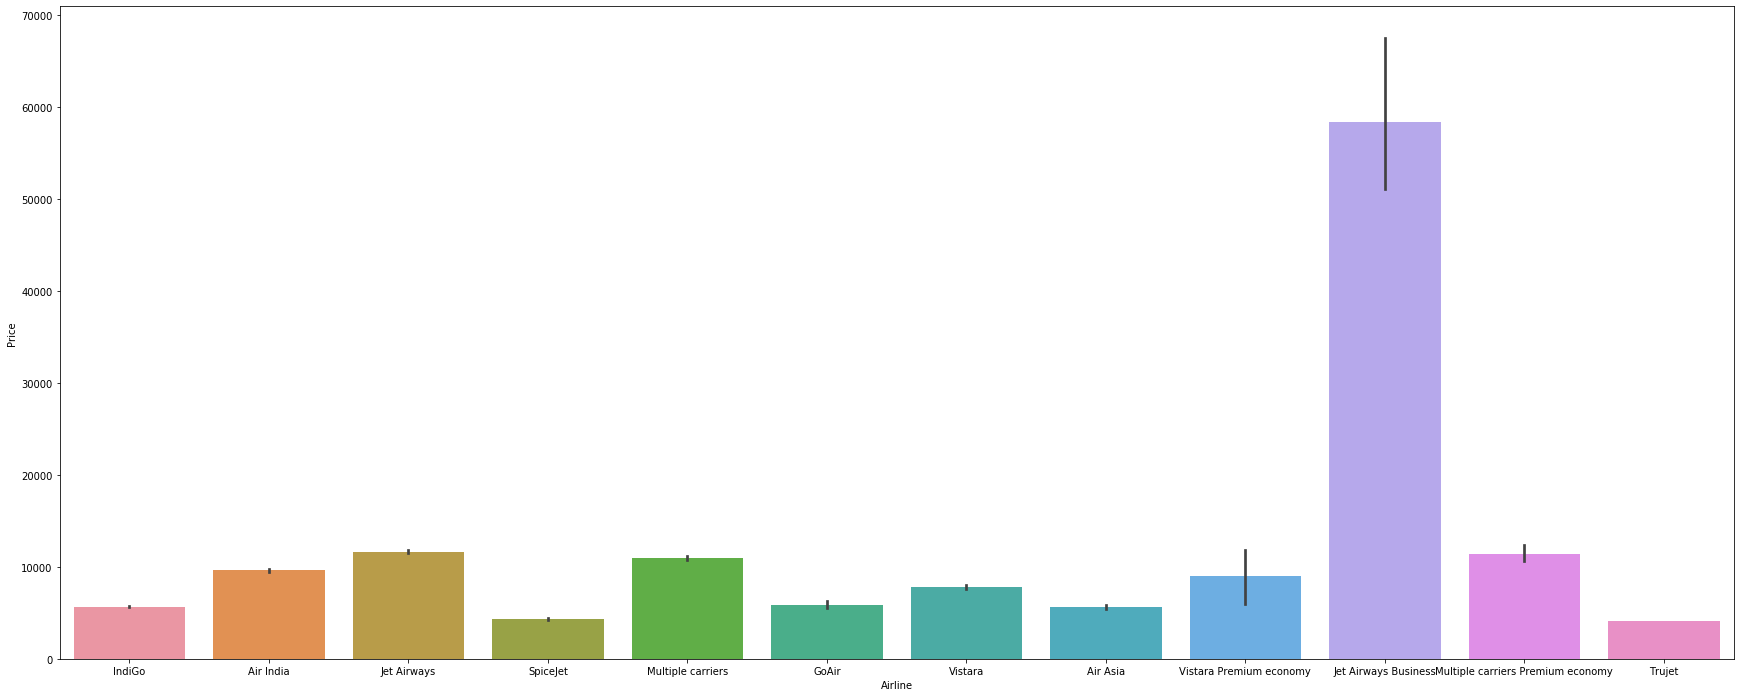

In [43]:
plt.figure(figsize=(30,12))
sns.barplot(x="Airline",y="Price",data=flight)
plt.show()    # jet airways business has high price so less people travel

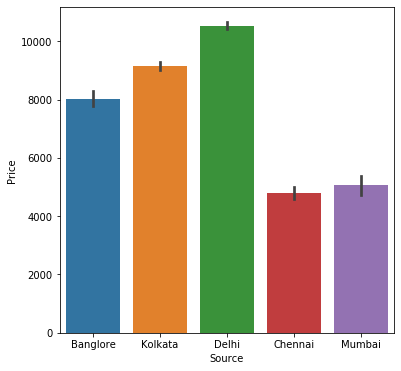

In [44]:
plt.figure(figsize=(6,6))
sns.barplot(x="Source",y="Price",data=flight)   # flight originating from new delhi have max price
plt.show()

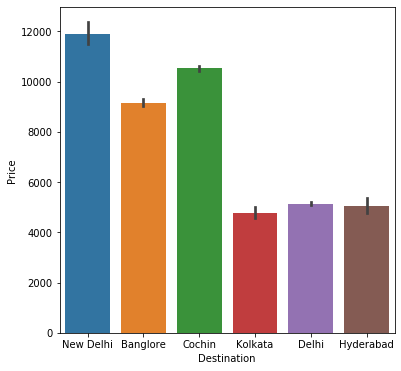

In [45]:
plt.figure(figsize=(6,6))
sns.barplot(x="Destination",y="Price",data=flight)
plt.show()    # flighs to  new delhi have max price

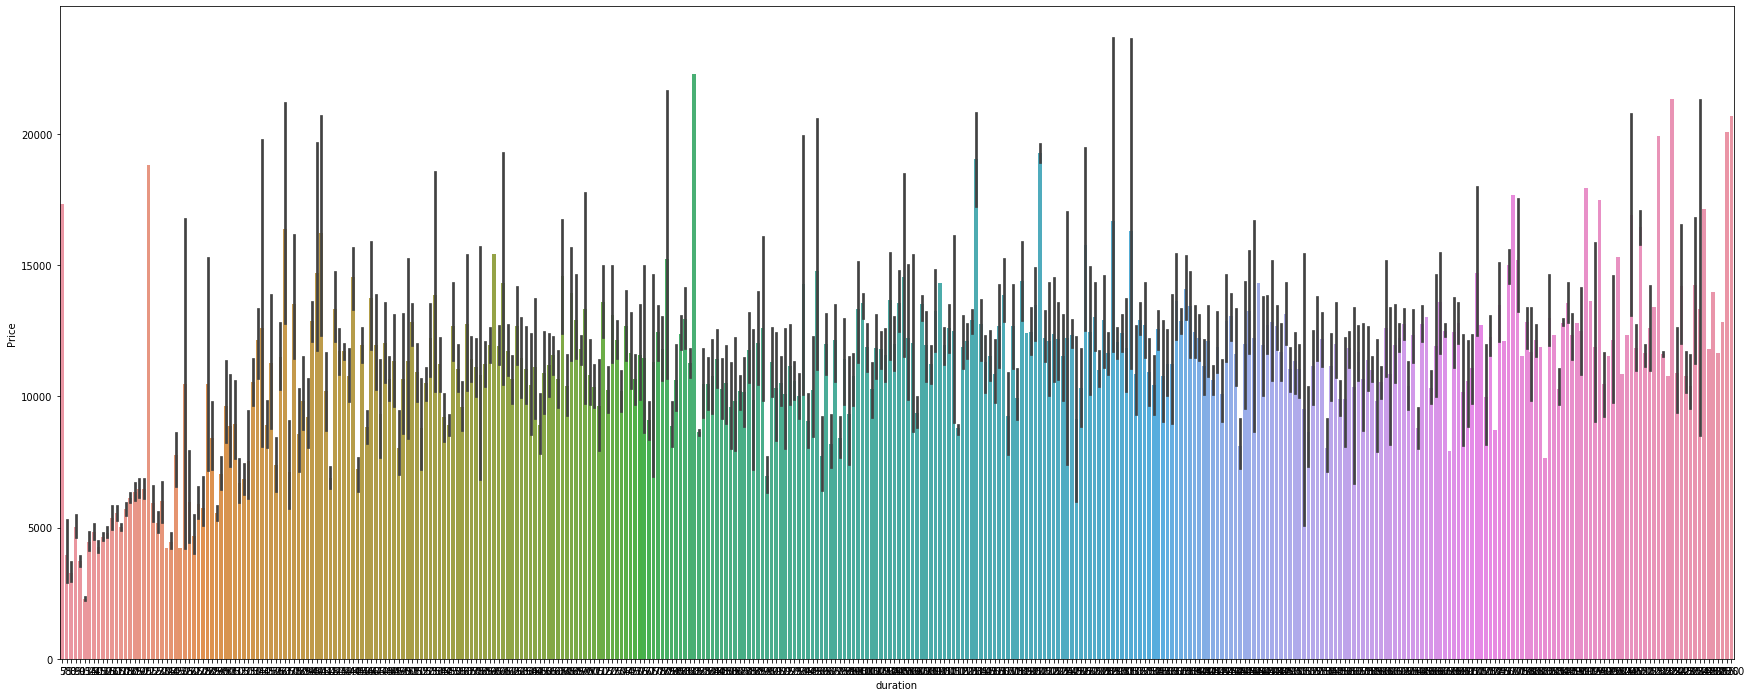

In [46]:
plt.figure(figsize=(30,12))
sns.barplot(x="duration",y="Price",data=flight)
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encode = ['Airline','Source','Destination','Additional_Info','Route']
for i in encode:
    flight[i]=le.fit_transform(flight[i].astype(str))
    flight_test[i]=le.fit_transform(flight_test[i].astype(str))

In [48]:
flight.dtypes

Airline            int32
Source             int32
Destination        int32
Route              int32
Total_Stops        int64
Additional_Info    int32
Price              int64
Journey_Day        int64
Journey_Month      int64
Arrive_h           int64
Arrive_min         int64
Dep_h              int64
Dep_min            int64
duration           int64
dtype: object

In [49]:
flight_test.dtypes

Airline            int32
Source             int32
Destination        int32
Route              int32
Total_Stops        int64
Additional_Info    int32
Journey_Day        int64
Journey_Month      int64
Arrive_h           int64
Arrive_min         int64
Dep_h              int64
Dep_min            int64
duration           int64
dtype: object

In [52]:
flight # additionaLInfo is not important variable can be dropped from both

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrive_h,Arrive_min,Dep_h,Dep_min,duration
0,3,0,5,18,0,8,3897,24,3,1,10,22,22,170
1,1,3,0,84,2,8,7662,1,5,13,15,5,5,445
2,4,2,1,118,2,8,13882,9,6,4,25,9,9,1140
3,3,3,0,91,1,8,6218,12,5,23,30,18,18,325
4,3,0,5,29,1,8,13302,1,3,21,35,16,16,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,0,8,4107,9,4,22,25,19,19,150
10679,1,3,0,64,0,8,4145,27,4,23,20,20,20,155
10680,4,0,2,18,0,8,7229,27,4,11,20,8,8,180
10681,10,0,5,18,0,8,12648,1,3,14,10,11,11,160


In [51]:
flight_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Arrive_h,Arrive_min,Dep_h,Dep_min,duration
0,4,2,1,76,1,5,24,3,1,10,22,22,655
1,3,3,0,65,1,5,1,5,13,15,5,5,240
2,4,2,1,76,1,3,9,6,4,25,9,9,1425
3,6,2,1,76,1,5,12,5,23,30,18,18,780
4,0,0,2,16,0,5,1,3,21,35,16,16,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,1,5,1,3,9,15,5,5,1435
2667,3,3,0,43,0,5,1,5,22,55,20,20,155
2668,4,2,1,76,1,5,12,5,5,35,9,9,395
2669,1,2,1,76,1,5,18,6,3,15,0,0,915


In [53]:
flight.drop(["Additional_Info"],axis=1,inplace=True)
flight_test.drop(["Additional_Info"],axis=1,inplace=True)

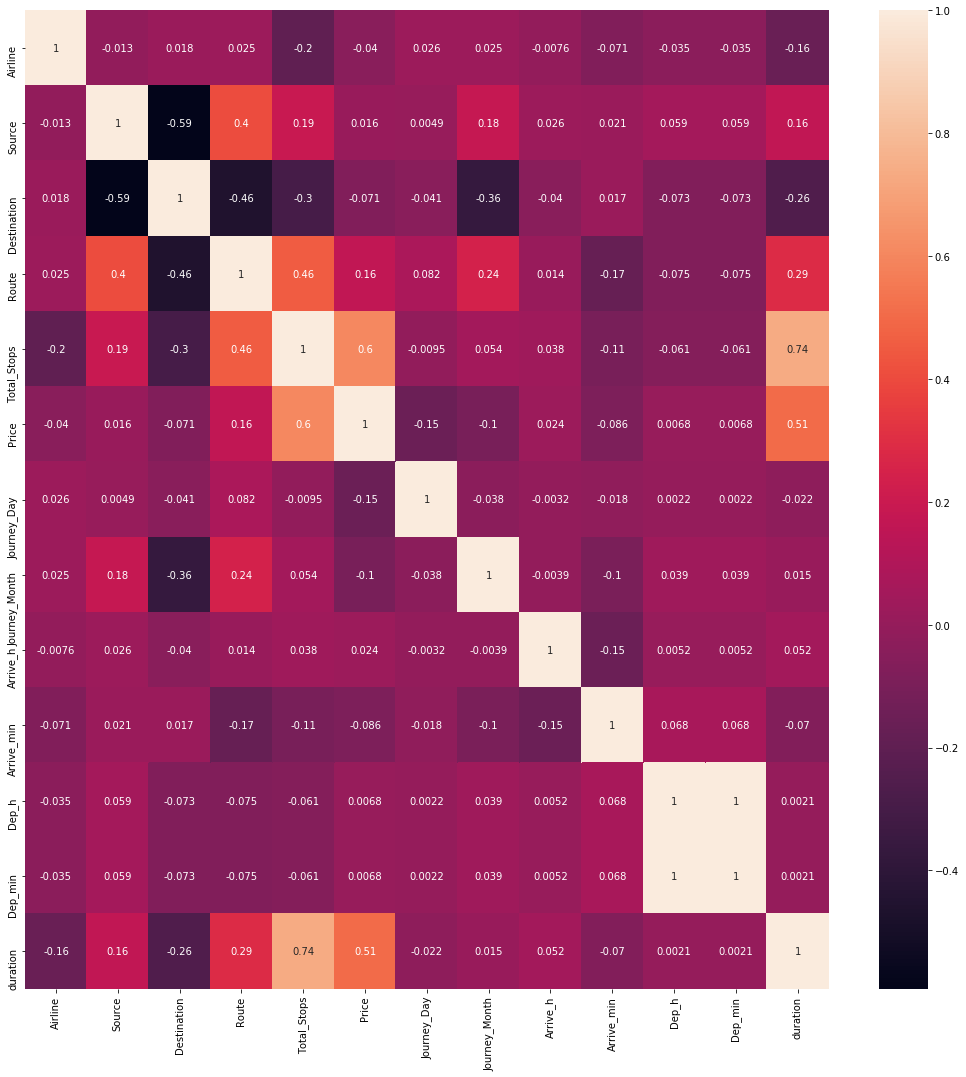

In [54]:
plt.figure(figsize=(18,18))
sns.heatmap(flight.corr(),annot= True)   # not much correlaton among varaibles observed
plt.show()

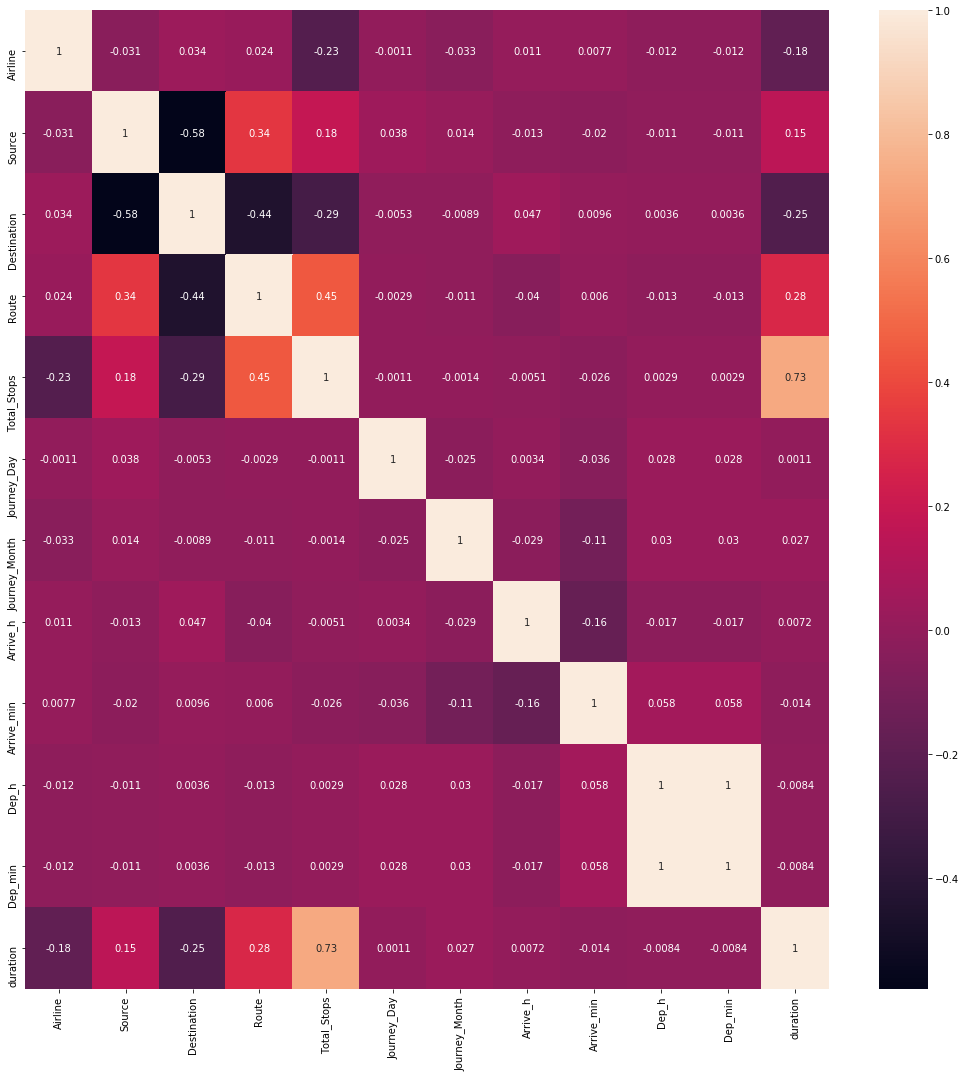

In [56]:
plt.figure(figsize=(18,18))
sns.heatmap(flight_test.corr(),annot= True)   #same here 
plt.show()

In [64]:
x= flight.drop('Price',axis=1)
y=flight['Price']
df_x= flight.drop('Price',axis=1)

In [65]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Journey_Day,Journey_Month,Arrive_h,Arrive_min,Dep_h,Dep_min,duration
0,3,0,5,18,0,24,3,1,10,22,22,170
1,1,3,0,84,2,1,5,13,15,5,5,445
2,4,2,1,118,2,9,6,4,25,9,9,1140
3,3,3,0,91,1,12,5,23,30,18,18,325
4,3,0,5,29,1,1,3,21,35,16,16,285


In [66]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [67]:
x.skew()

Airline          0.731057
Source          -0.424023
Destination      1.244046
Route           -0.501911
Total_Stops      0.317109
Journey_Day      0.118174
Journey_Month   -0.387409
Arrive_h        -0.370146
Arrive_min       0.110945
Dep_h            0.112924
Dep_min          0.112924
duration         0.861411
dtype: float64

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [70]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 3}

In [71]:
lr = LinearRegression()
ls=Lasso(alpha=0.1)
rg = Ridge(alpha=0.1)
knr= KNeighborsRegressor(n_neighbors=3)

In [75]:
def maxr2_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_score)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [76]:
r_state= maxr2_score(lr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  43 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  44 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  45 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  46 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  47 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  48 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  49 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  50 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  51 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  52 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  53 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  54 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to

In [77]:
r_state= maxr2_score(knr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  43 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  44 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  45 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  46 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  47 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  48 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  49 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  50 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  51 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  52 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  53 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  54 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to

In [78]:
r_state= maxr2_score(ls,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  43 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  44 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  45 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  46 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  47 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  48 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  49 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  50 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  51 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  52 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  53 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  54 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 1, 'n_estimators': 250}

In [80]:
gbr = GradientBoostingRegressor(learning_rate=1,n_estimators=250)

In [81]:
r_state= maxr2_score(gbr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  43 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  44 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  45 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  46 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  47 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  48 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  49 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  50 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  51 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  52 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  53 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  54 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to

In [82]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada = AdaBoostRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250],"base_estimator":[lr,ls,DecisionTreeRegressor(),knr]}
fd = GridSearchCV(ada,parameters,cv=5)
fd.fit(x,y)
fd.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 150}

In [83]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=150)

In [84]:
r_state= maxr2_score(ada,x,y)

r2 score corresponding to  42 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  43 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  44 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  45 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  46 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  47 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  48 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  49 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  50 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  51 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  52 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  53 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to  54 is <function r2_score at 0x000002679F9CCA68>
r2 score corresponding to

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=58 ,test_size=0.1)
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=150)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)   # Ada boost Regressor had the best  results

In [86]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score:",r2_score(y_test,y_pred)*100)

RMSE is: 1901.7355858336336
r2 score: 83.43527987079932


In [90]:
# here adaboost regressor is performing well

In [91]:
from sklearn.externals import joblib
joblib.dump(ada,"Flight Fare.obj")

['Flight Fare.obj']

In [92]:
model = joblib.load('Flight Fare.obj')

In [93]:
model.predict(x_test)

array([ 7598.07407407, 12819.        ,  4777.        , ...,
        5510.        ,  8372.        ,  4668.        ])